# CI-0115 Probabilidad y Estadística
## Prof. Sebastián Ruiz Blais
### I -2024

### Proyecto

#### Daniel Rojas Morales - C26836
#### José Pablo Mora Cubillo - B75044

---

## ¿Por qué se eligió este tema y esta base de datos?

Los vinos son productos ampliamente consumidos y valorados en todo el mundo, lo que genera una gran cantidad de datos relacionados con su producción, características químicas y sensoriales, así como su comercialización y consumo.
En este contexto, la elección de las bases de datos específicas de vinos (tanto blancos como rojos) ofrece la oportunidad de realizar un análisis comparativo entre diferentes tipos y variedades de vinos, así como de investigar factores que influyen en su calidad y características como:

1. Relación entre las propiedades químicas y la calidad del vino.
2. Impacto del contenido de azúcar residual en la calidad del vino.
3. Efecto de los niveles de dióxido de azufre en la calidad del vino.
4. Correlación entre el contenido de alcohol y la calidad del vino.
5. Diferencias entre las propiedades fisicoquímicas de los vinos rojos y blancos. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Segunda entrega: 
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# cargar los datos
dataWhite = pd.read_csv('winequality-white.csv', sep=';')
dataRed = pd.read_csv('winequality-red.csv')

## Visualizaciones iniciales

A continuación, se muestra la cantidad de filas (observaciones) y columnas (variables) para ambas bases de datos.

In [3]:
print("1) Para vinos blancos la cantidad de filas es " + str(dataWhite.shape[0]) +
      " y la cantidad de columnas es " + str(dataRed.shape[1]) + ".")


print("2) Para vinos rojos/tintos la cantidad de filas es " + str(dataRed.shape[0]) +
      " y la cantidad de columnas es " + str(dataRed.shape[1]) + ".")

1) Para vinos blancos la cantidad de filas es 4898 y la cantidad de columnas es 12.
2) Para vinos rojos/tintos la cantidad de filas es 1599 y la cantidad de columnas es 12.


Primeras filas de `dataWhite`:

In [4]:
dataWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Primeras filas de `dataRed`:

In [5]:
dataRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Nota**: como ambos `DataFrames` tienen las mismas columnas, es posible concatenarlos en un único `DataFrame`

In [6]:
# Para los vinos rojos, agregamos una nueva columna llamada `data_type` y a todas las observaciones le asignamos como valor `Red`
dataRed['wine_type'] = "Red"

# Para los vinos blanco, agregamos una nueva columna llamada `data_type` y a todas las observaciones le asignamos como valor `White`
dataWhite['wine_type'] = "White"

# Se realiza la concatenación
dataWine = pd.concat([dataRed, dataWhite], axis = 0) # `axis=0` indica que se debe concatenar verticalmente
dataWine.reset_index(drop=True, inplace=True) # resetear los índices

# La siguiente línea permite corroborar que las dimensiones del nuevo `DataFrame` son correctas
dataWine.shape # retorna tupla de la forma (filas, columnas)

(6497, 13)

## Explicación de las columnas en las bases de datos de vinos:

1. **Fixed Acidity:** La cantidad total de ácidos (g/l) en el vino.
2. **Volatile Acidity:** La cantidad de ácidos volátiles (g/l) en el vino.
3. **Citric Acid:** La cantidad de ácido cítrico (g/l) en el vino.
4. **Residual Sugar:** La cantidad de azúcar residual (g/l) que queda después de la fermentación.
5. **Chlorides:** La cantidad de cloruros (g/l) en el vino.
6. **Free Sulfur Dioxide:** La cantidad de dióxido de azufre libre (mg/l) en el vino.
7. **Total Sulfur Dioxide:** La cantidad total de dióxido de azufre (mg/l) en el vino.
8. **Density:** La densidad del vino (g/cm³).
9. **pH:** El nivel de acidez o alcalinidad del vino, en una escala de 0 a 14.
10. **Sulphates:** La cantidad de sulfatos (g/l) en el vino.
11. **Alcohol:** El contenido de alcohol (% vol.) en el vino.
12. **Quality:** La calidad del vino, evaluada en una escala de 1 a 10.
13. **Wine Type:** El tipo de vino (blanco o rojo/tinto). 

## Seleccionar las variables de interes

Para seleccionar nuestras variables de interés, es importante considerar que nuestro principal objetivo es __determinar cuáles variables fisicoquímicas afectan calidad del vino__. Debido a que no conocemos _a priori_ de los efectos de nuestras variables sobre la calidad de los vinos, aunado a que no contamos con conocimientos sobre la química de los vinos, decidimos que el mejor enfoque es incluir todas las variables de la base de datos. Consideramos que este enfoque es el que tiene mayores posibilidades de permitirnos responder nuestra pregunta.  

In [7]:
# Renombrar variables de interes para la base de datos de vinos
dataWine = dataWine.rename(columns={'fixed acidity' : 'fixed_acidity',
                                    'citric acid' : 'citric_acid',
                                    'residual sugar' : 'residual_sugar',
                                    'free sulfur dioxide' : 'free_SO2',
                                    'total sulfur dioxide' : 'total_SO2',
                                    'volatile acidity' : 'volatile_acidity'})

dataWine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


##  Pre-procesamiento para filtrar los datos

Para esta base de datos, no se cuenta con datos de fechas ni rangos similares, por lo que no es posible excluir
por rango de estudio. Al revisar detalladamente la base de datos, no se encontró celdas con datos faltantes o `NaNs`. Lo anterior tambien es posible corroborarlo mediante el siguiente comando: 

In [8]:
dataWine.isna().sum(axis=0) # se cuenta la cantidad de `na` para cada fila. 

fixed_acidity       0
volatile_acidity    0
citric_acid         0
residual_sugar      0
chlorides           0
free_SO2            0
total_SO2           0
density             0
pH                  0
sulphates           0
alcohol             0
quality             0
wine_type           0
dtype: int64

Debido a lo anterior, en esta sección no se eliminaron datos.

##  Histogramas para visualizar las distribuciones de las variables de interés

La calidad es la variable de interes que más nos interesa, a continuación se muestra su distribución:

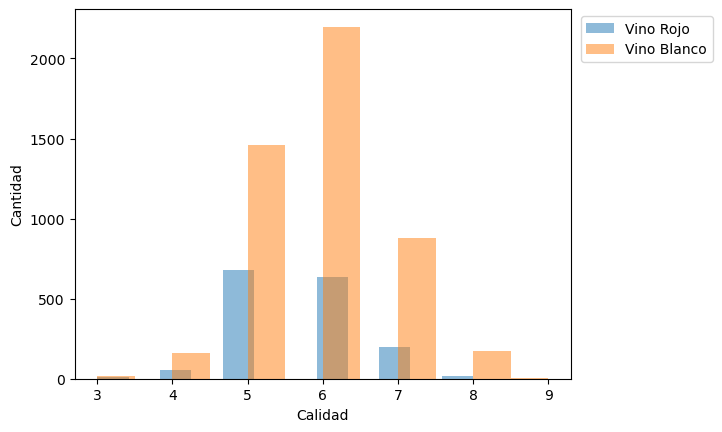

In [9]:
# Se agrego más bins que categorías para facilitar la visualización del histograma
plt.hist(dataWine[(dataWine["wine_type"] == "Red")]["quality"], alpha = 0.5, bins = 12, label = "Vino Rojo")
plt.hist(dataWine[(dataWine["wine_type"] == "White")]["quality"], alpha = 0.5, bins = 12, label = "Vino Blanco")
plt.legend(bbox_to_anchor = (1.3, 1)) # `bbox_to_anchor` para mover la leyenda fuera del gráfico
plt.xlabel("Calidad")
plt.ylabel("Cantidad")
plt.show()

Como se muestra en el siguiente histograma, la distribución de las calidades recuerda una distribución normal, siendo la calidad más frecuente la calidad 6. Sin embargo, las distribuciones varían entre ambos tipos de vinos. En el caso del vino blanco, el valor más frecuente es la calidad 6, pero en el vino rojo hay cantidades parecidas para las calidades 5 y 6.

Es evidente que la cantidad de observaciones para vinos de calidad 3 y 9 es reducida.

In [10]:
# Cantidad de vinos con calidad 3
(dataWine["quality"] == 3).sum()

30

In [11]:
# Cantidad de vinos con calidad 9
(dataWine["quality"] == 9).sum()

5

El resto de los histogramas se visualizan en el siguiente gráfico:

In [12]:
# Almacenamos el nombre de columnas en una lista, excluimos las últimas dos
columns = dataWine.iloc[:,:11].columns.tolist() # castear objeto de tipo ` pandas.core.indexes.base.Index` a una lista

In [13]:
# guardamos el nombre de las etiquetas de los ejes Y y X
ylabel = "Cantidad"
xlabels = ["Acidez fija (g/L)", "Acidez volátil (g/L)", "Ácido cítrico (g/L)", 
           "Azúcar residual (g/L)", "Cloruros (g/L)", "Dióxido de azufre libre (mg/L)",
          "Dióxido de azufre total (mg/L))", "Densidad (g/cm^3)", "pH",
          "Sulfatos (g/L)", "Alcohol (% vol.)"]

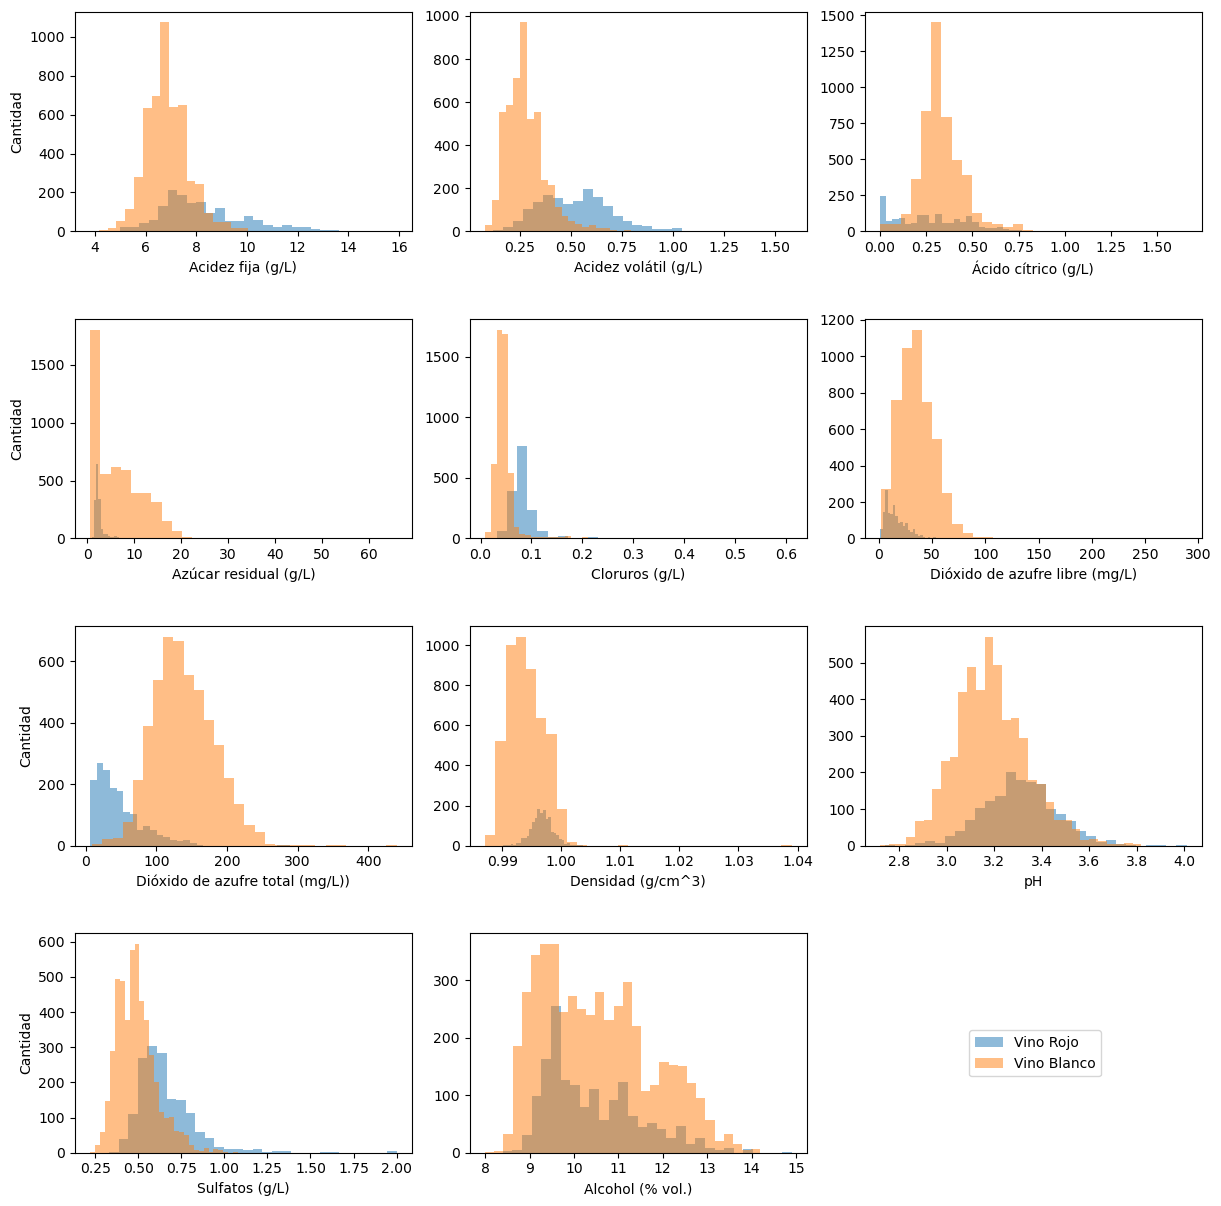

In [14]:
fig, pos = plt.subplots(4, 3, figsize=(12, 12))  # 4 filas y 3 columnas
fig.tight_layout()  # para separar los gráficos
fig.subplots_adjust(hspace=0.4)  # aumentar el espacio entre filas


for i, col_name in enumerate(columns): # De manera que i es el indice y col_name valor de la lista
    # Usamos lógica modular para calcular el valor de las filas y las columnas
    row_i = i // 3
    col_i = i % 3
    # Crear los histogramas
    pos[row_i][col_i].hist(dataWine[(dataWine["wine_type"] == "Red")][columns[i]], bins = 30, alpha = 0.5, label = "Vino Rojo")
    pos[row_i][col_i].hist(dataWine[(dataWine["wine_type"] == "White")][columns[i]], bins = 30, alpha = 0.5, label = "Vino Blanco")
    
    
    # Poner etiqueta del eje x
    pos[row_i][col_i].set_xlabel(xlabels[i])
    
    # Únicamente ponemos el nombre de la etiqueta del eje y una vez por fila
    if col_i == 0:
        pos[row_i][col_i].set_ylabel(ylabel)
        
    
pos[3][2].axis('off') # para evitar que se muestre el subplot vacío que está en la posición [3][2]

fig.legend(["Vino Rojo", "Vino Blanco"], bbox_to_anchor = (0.90, 0.14)) # `bbox_to_anchor` para mover la leyenda 

plt.show()

- Podemos observar que, en la mayoría de las variables, la distribución presentada entre ambos tipos de vinos varía en algún grado. Es más evidente en las variables `Acidez volátil`, `Cloruros`, `Dióxido de azufre total` y `sulfatos`.

- La mayoría de las distribuciones recuerda a una distribución normal.

- En el caso del `Alcohol`, pareciera que la distribución es bimodal para el caso del vino blanco y  sesgada a la izquierda para el vino rojo. 

- También parecen ser distribuciones sesgadas a la izquierda el `Azúcar residual` para ambos tipos de vinos, y el `Dióxido de azufre libre` y `Dióxido de azufre total` para el vino rojo.

- La distribución del `Ácido cítrico` para el vino rojo no está clara.

## Cálculo de media y desviación estándar

A continuación se presenta el cálculo de la media y de la desviación estándar para cada variable, considerando el total de los datos, así como los datos de los vinos blancos y rojos por separado:

In [15]:
# # excluimos la variable categorica `wine_type`
stadistics = pd.concat([dataWine.iloc[:,0:12].mean(), # promedio total
                  dataWine.iloc[:,0:12].std(), # desviación estándar total 
                  dataWine[dataWine["wine_type"] == "White"].iloc[:,0:12].mean(), # Promedio vinos blancos
                  dataWine[dataWine["wine_type"] == "White"].iloc[:,0:12].std(), # desviación estándar vinos rojos
                  dataWine[dataWine["wine_type"] == "Red"].iloc[:,0:12].mean(), 
                  dataWine[dataWine["wine_type"] == "Red"].iloc[:,0:12].std()],
                  axis = 1)
stadistics.columns = ["Total_mean", "Total_SD", "White_mean", "White_SD", "Red_mean", "Red_SD"] #agregar nombre de las columnas
stadistics

,Total_mean,Total_SD,White_mean,White_SD,Red_mean,Red_SD
fixed_acidity,7.215307,1.296434,6.854788,0.843868,8.319637,1.741096
volatile_acidity,0.339666,0.164636,0.278241,0.100795,0.527821,0.179060
citric_acid,0.318633,0.145318,0.334192,0.121020,0.270976,0.194801
residual_sugar,5.443235,4.757804,6.391415,5.072058,2.538806,1.409928
chlorides,0.056034,0.035034,0.045772,0.021848,0.087467,0.047065
free_SO2,30.525319,17.749400,35.308085,17.007137,15.874922,10.460157
total_SO2,115.744574,56.521855,138.360657,42.498065,46.467792,32.895324
density,0.994697,0.002999,0.994027,0.002991,0.996747,0.001887
pH,3.218501,0.160787,3.188267,0.151001,3.311113,0.154386
sulphates,0.531268,0.148806,0.489847,0.114126,0.658149,0.169507


## Correlaciones entre las variables de interés 

Para este caso, se calculó las matrices de correlaciones para:
1) Vino rojo/tinto
2) Vino blanco
3) Ambos tipos

__Notar__ que la última fila presenta las correlaciones de todas las variables contra la calidad.  

In [16]:
# Correlaciones para vinos rojos
(dataWine[(dataWine["wine_type"] == "Red")]).iloc[:, 0:12].corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_SO2,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_SO2,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [17]:
# Correlaciones para vinos blancos
(dataWine[(dataWine["wine_type"] == "White")]).iloc[:, 0:12].corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_SO2,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_SO2,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [18]:
# Correlaciones para ambos tipos
dataWine.iloc[:, 0:12].corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_SO2,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_SO2,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Si se eliminan las calidades que cuentan con pocas observaciones (calidad 3 y 9), no se observa una mejora evidente en los valores de correlación. En algunos casos la correlación aumenta ligeramente y en otros disminuye. Lo anterior se comprobó con el siguiente código:

In [19]:
# Eliminar calidades 3 y 9
dataWine_between_4_8 = dataWine[~dataWine["quality"].isin([3, 9])]
dataWine_between_4_8.iloc[:, 0:12].corr().iloc[11:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
quality,-0.072305,-0.259724,0.083112,-0.038387,-0.196806,0.065998,-0.041316,-0.307659,0.02235,0.038415,0.451626,1.0


## Graficar variables de interés una en función de la otra

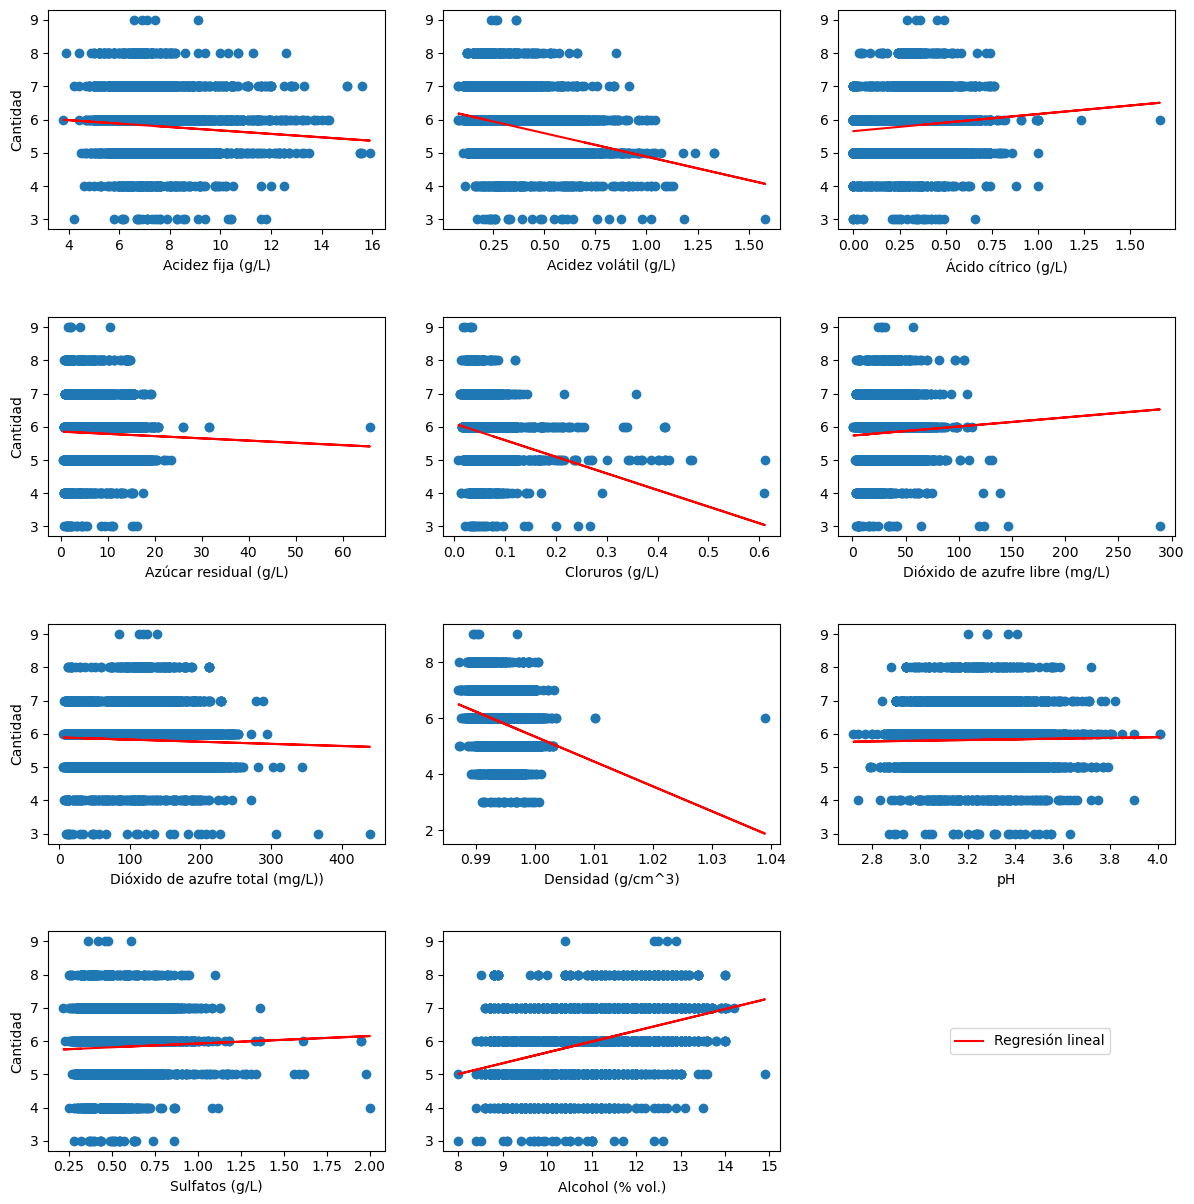

In [20]:
fig, pos = plt.subplots(4, 3, figsize=(12, 12))  # 4 filas y 3 columnas
fig.tight_layout()  # para separar los gráficos
fig.subplots_adjust(hspace=0.4)  # aumentar el espacio entre filas


for i, col_name in enumerate(columns): # De manera que i es el indice y col_name valor de la lista
    # Usamos lógica modular para calcular el valor de las filas y las columnas
    row_i = i // 3
    col_i = i % 3
    # Crear los gráficos de dispersión
    pos[row_i][col_i].scatter(dataWine[columns[i]], dataWine["quality"])
    
    # Poner etiqueta del eje x
    pos[row_i][col_i].set_xlabel(xlabels[i])
    
    # Únicamente ponemos el nombre de la etiqueta del eje y una vez por fila
    if col_i == 0:
        pos[row_i][col_i].set_ylabel(ylabel)
        
    # Se agrega la línea que mejor ajusta los datos
    m, b = np.polyfit(dataWine[columns[i]], dataWine["quality"], 1) # se le indica que ajuste 
                                                                    # para un polinomio de grado 1 
    # Se calcula la recta
    line = m * dataWine[columns[i]] + b
    
    # Agregar la recta al subplot
    # Este condicional es la forma más facil encontrada para evitar que la leyenda se repita
    if i == 0:
        pos[row_i][col_i].plot(dataWine[columns[i]], line, color='red', label='Regresión lineal')
    else:
         pos[row_i][col_i].plot(dataWine[columns[i]], line, color='red')
        
    
pos[3][2].axis('off') # para evitar que se muestre el subplot vacío que está en la posición [3][2]
fig.legend(bbox_to_anchor = (0.93, 0.14)) # `bbox_to_anchor` para mover la leyenda 

plt.show()

## Identificar datos atípicos (outliers) y descartarlos.

Al revisar opciones para eliminar outliers, encontramos que opciones más populares se basan en desviaciones estándar o en rango intercuartil (IQR), nos decidimos por este ultimo porque el IQR es poco afectados por outliers. Nos vamos a basar en: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In [21]:
nrows_before = dataWine.shape[0]

# Los datos se almacen en un diccionario separando por tipo de vinp
quantileDic = {
  "Red":[],
  "White":[]
}

for i in range(dataWine.shape[1] - 2):
    for name in quantileDic:
        # Calcular primer cuartil, tercer cuartil y IQR
        Q1 = dataWine[dataWine["wine_type"] == name][columns[i]].quantile(0.25)
        Q3 = dataWine[dataWine["wine_type"] == name][columns[i]].quantile(0.75)
        quantileDic[name].append([Q1, Q3, Q3 - Q1])
        


for i in range(dataWine.shape[1] - 2): # excluir ultimas dos columnas
    for name in quantileDic:
        dataWine.reset_index(drop=True, inplace=True) # resetear los índices, de lo contrarío se presenta un error
        lower = quantileDic[name][i][0] - 3*quantileDic[name][i][2] # Q1 - 3*IQR
        upper = quantileDic[name][i][1] + 3*quantileDic[name][i][2] # Q3 - 3*IQR
        # Crear un array que contenga las filas donde se superó el límite superior o inferior 
        upper_list = np.where((dataWine[columns[i]] >= upper) & (dataWine["wine_type"] == name))[0]
        lower_list = np.where((dataWine[columns[i]] <= lower) & (dataWine["wine_type"] == name))[0]
        
        
        # Eliminar los outliers
        dataWine.drop(index=upper_list, inplace=True)
        dataWine.drop(index=lower_list, inplace=True)

Como se muestra a continuación, la cantidad de filas eliminadas fue 375. 

In [22]:
nrows_before - dataWine.shape[0] #375

375

Es importante realizar dos aclaraciones:

    (1)	Se decidió realizar el análisis separando de acuerdo con el tipo de vino porque los resultados iniciales mostraban que se eliminaban muchas más filas de vinos rojos que de vinos blancos. Esto posiblemente se deba a que la cantidad de vinos rojos es menor, por lo que en las variables donde la distribución cambiaba de acuerdo con el tipo de vino, tendían a ser considerados como ourliers. 

    (2)	Se decidió aumentar el valor por el que se multiplica el IQR de 1.5 (valor usado típicamente para considerar un valor como outlier) a 3. Esto porque con 1.5 se eliminaba cerca de 1400 datos. Para escoger el nuevo valor, se probo los resultados y se visualizó en la celda de código 21 (gráficos de dispersión X vs. Y) para comprobar que efectivamente se estuviera eliminando los valores que parecían ser outliers. 


Posteriormente a la eleminación de los _outliers_, podemos volver a calcular las correlaciones:

In [23]:
dataWine.iloc[:, 0:12].corr().iloc[11:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
quality,-0.08034,-0.25175,0.093547,-0.038093,-0.252187,0.081025,-0.028563,-0.318176,0.012336,0.05781,0.447549,1.0


A partir del código anterior, se puede concluir que, con excepción de `volatile_acidity` y `total_SO2`, las variables presentaron ligeros aumentos en sus valor de correlación. De igual manera, se puede analizar los tipos de vino por separado:

In [24]:
(dataWine[(dataWine["wine_type"] == "Red")]).iloc[:, 0:12].corr().iloc[11:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
quality,0.116555,-0.387266,0.24055,-0.002865,-0.176484,-0.037092,-0.202603,-0.201622,-0.064598,0.379043,0.489736,1.0


En el caso de vinos rojos, se notó una mejora importante en el valor de correlación de `sulphates` (de 0.251 a 0.379) y en `chlorides` (de 12.9 a 0.176), asi como una mejora moderada en `density` (de -0.175 a -0.2026) y `total_SO2` (de -0.185 a -0.202). Para `volatile_acidity`, `residual_sugar` y `free_SO2` hubo ligeras disminuciones. 

In [25]:
(dataWine[(dataWine["wine_type"] == "White")]).iloc[:, 0:12].corr().iloc[11:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
quality,-0.103382,-0.164402,-0.009012,-0.103456,-0.285711,0.033361,-0.16228,-0.313513,0.093284,0.057954,0.436831,1.0


En el caso de vinos blancos, se notó mejoras moderadas en `chlorides` (de -0.201 -0.286), mientras que hubo una disminución moderada en `volatile_acidity` (de -0.195 a -0.164). 

## Documentar las preguntas que les gustaría responder

1. ¿Cuáles variables fisicoquímicas afectan la calidad de los vinos?

2. ¿Cuál es el efecto de cada variable sobre la calidad de los vinos?

       R: Las preguntas 1 y 2 se respondieron de manera parcial con el análisis realizado, se encontró que las variables que mejor se correlacionan con la calidad de los vinos es alcohol (0.447549), density (0.318176) y volatile_acidity (-0.25175). Los valores relativamente bajos de las correlaciones podrían estar indicando de que se requiere de métodos más robustos para responder estas preguntas. Por ejemplo, es posible que los efectos de las variables sobre la calidad se puedan describir de mejor manera si se consideran funciones con 2 o más variables. Otra alternativa es que las variables no se relaciones de forma lineal con la calidad, por ejemplo, que valores muy bajos o altos de una variable determinada produzcan vinos de menor calidad. 
   

3. ¿Cuáles son las diferencias en las propiedades fisicoquímicas entre los vinos blancos y los vinos tintos?

       R: Esta pregunta se respondió de forma parcial. Con los histogramas se puede visualizar es diferente según el tipo de vino para variables como volatile_acidity, chlorides, total_SO2 y sulphates. De igual manera, estas diferencias son respaldadas por los valores de los promedios y de la desviación estándar para cada variable (celda 15). No obstante, la cantidad de variables complica resumir estos datos de forma que sean fácilmente entendibles por humanos, por lo que consideramos que lo ideal es buscar métodos alternativos (como técnicas de reducción de la dimensionalidad). 

4.  ¿Es posible predecir el tipo de vino de una muestra basándose en un conjunto de propiedades fisicoquímicas dadas?

5.  ¿Es posible predecir la calidad de una muestra de vino basándose en un conjunto de propiedades fisicoquímicas dadas?


        R: No es posible responder las preguntas 4 y 5 con los análisis realizados.  

## ------- Entrega 2 -------

Inclusión de un tercer `DataFrame` llamado `dataComp`

In [26]:
dataComp = pd.read_csv('composition-wine.csv')

Primeras filas de `dataComp`:

In [27]:
dataComp.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


La nueva base de datos aporta nuevas variables que ayudarán a responder las preguntas planteadas anteriormente. Esta base de datos puede ser unida a `dataWine` por medio de la variable `Alcohol` asociando el porcentaje promedio de cada vino con las variables de `dataComp`, sin embargo, se tomatará solamente como referencia y se trabajarán de manera separada. De necesitar unificar ambos se utilizaría el siguiente códgio:

_Nota: Además de la nueva base de datos, anteriormente se unieron las bases de datos de `dataWhite` y `dataRed` en `dataWine`, cumpliendo con la especificación 1 de la segunda entrega._

In [28]:
# Fusionar los DataFrames basado en la columna 'Alcohol'
# merged_data = pd.merge(dataWine, dataComp, on='Alcohol', how='inner')

## Preguntas a analizar

Preguntas que comparten categoría:

1. ¿Cuáles son las diferencias en las propiedades fisicoquímicas entre los vinos blancos y los vinos tintos en términos de acidez fija y pH?
2. ¿Cuál es el efecto de la acidez volátil y los azúcares residuales sobre la calidad del vino, categorizada como baja, media, alta?
3. ¿Es posible predecir el tipo de vino (blanco o tinto) basándose en las propiedades fisicoquímicas del pH y la acidez fija?

Preguntas que combinan variables:

4. ¿Es posible predecir la calidad del vino basándose en la acidez fija y la densidad?
5. ¿Cuáles variables fisicoquímicas, como el pH y los sulfitos (SO2 libre), tienen mayor impacto en la calidad del vino, diferenciando entre alta calidad y baja calidad?


## Gráficas de Dispersión de las variables de interés

Analizando los gráficos de dispersión con líneas de regresión lineal superpuestas realizado en la primera entrega se tiene lo siguiente:

****1. Acidez fija (g/L) vs Cantidad:****

Distribución: Los puntos están dispersos a lo largo del eje de acidez fija, aunque se observa una mayor concentración de datos en el rango de 6 a 9 g/L.
Tendencia: La línea de tendencia (roja) muestra una ligera pendiente negativa, indicando que a mayor acidez fija, la cantidad tiende a disminuir ligeramente.

****2. Acidez volátil (g/L) vs Cantidad:****

Distribución: Los datos están bastante dispersos en el rango de 0.1 a 0.6 g/L, con una mayor concentración alrededor de 0.3 g/L.
Tendencia: La línea de tendencia también muestra una pendiente negativa, sugiriendo que una mayor acidez volátil se asocia con una menor cantidad.

****3. Ácido cítrico (g/L) vs Cantidad:****

Distribución: Los puntos están concentrados principalmente en el rango de 0 a 0.75 g/L.
Tendencia: La línea de tendencia tiene una pendiente positiva, lo que indica que cantidades mayores de ácido cítrico tienden a estar asociadas con cantidades mayores.

****4. Azúcar residual (g/L) vs Cantidad:****

Distribución: Los datos están dispersos ampliamente, pero se concentran en los rangos de 0 a 10 g/L y en menor medida hasta 30 g/L, con algunos valores atípicos llegando hasta 60 g/L.
Tendencia: La línea de tendencia muestra una leve pendiente negativa, sugiriendo una ligera disminución en la cantidad con un aumento en el azúcar residual.

****5. Cloruros (g/L) vs Cantidad:****

Distribución: Los puntos están dispersos principalmente en el rango de 0 a 0.2 g/L, con una menor cantidad de datos en rangos mayores hasta 0.6 g/L.
Tendencia: La línea de tendencia es negativa, indicando que mayores niveles de cloruros tienden a asociarse con cantidades menores.

****6. Dióxido de azufre libre (mg/L) vs Cantidad:****

Distribución: Los datos están dispersos a lo largo de todo el rango hasta 300 mg/L, con una mayor concentración en los primeros 50 mg/L.
Tendencia: La línea de tendencia muestra una pendiente positiva, sugiriendo que mayores niveles de dióxido de azufre libre se asocian con mayores cantidades.

****7. Dióxido de azufre total (mg/L) vs Cantidad:****

Distribución: Los puntos están bastante dispersos a lo largo del eje de dióxido de azufre total, con una mayor concentración de datos en el rango de 0 a 200 mg/L.
Tendencia: La línea de tendencia (roja) es casi horizontal, indicando que no hay una relación significativa entre el dióxido de azufre total y la cantidad.

****8. Densidad (g/cm³) vs Cantidad:****

Distribución: Los datos están concentrados principalmente en el rango de 0.99 a 1.00 g/cm³, con algunos valores atípicos en rangos mayores.
Tendencia: La línea de tendencia muestra una pendiente negativa pronunciada, sugiriendo que una mayor densidad se asocia con una menor cantidad.

****9. pH vs Cantidad:****

Distribución: Los puntos están dispersos principalmente en el rango de pH de 3.0 a 3.6, con algunas concentraciones más altas alrededor de 3.3 a 3.4.
Tendencia: La línea de tendencia es casi horizontal, indicando que no hay una relación significativa entre el pH y la cantidad.

****10. Sulfatos (g/L) vs Cantidad:****

Distribución: Los datos están dispersos en el rango de 0.25 a 1.25 g/L, con algunas concentraciones más altas alrededor de 0.5 a 0.75 g/L.
Tendencia: La línea de tendencia muestra una ligera pendiente positiva, indicando que una mayor cantidad de sulfatos tiende a asociarse con una mayor cantidad.

****11. Alcohol (% vol.) vs Cantidad:****

Distribución: Los puntos están dispersos a lo largo del eje de alcohol, con una mayor concentración de datos en el rango de 9 a 12 % vol.
Tendencia: La línea de tendencia tiene una pendiente positiva, lo que indica que una mayor cantidad de alcohol tiende a estar asociada con una mayor cantidad.

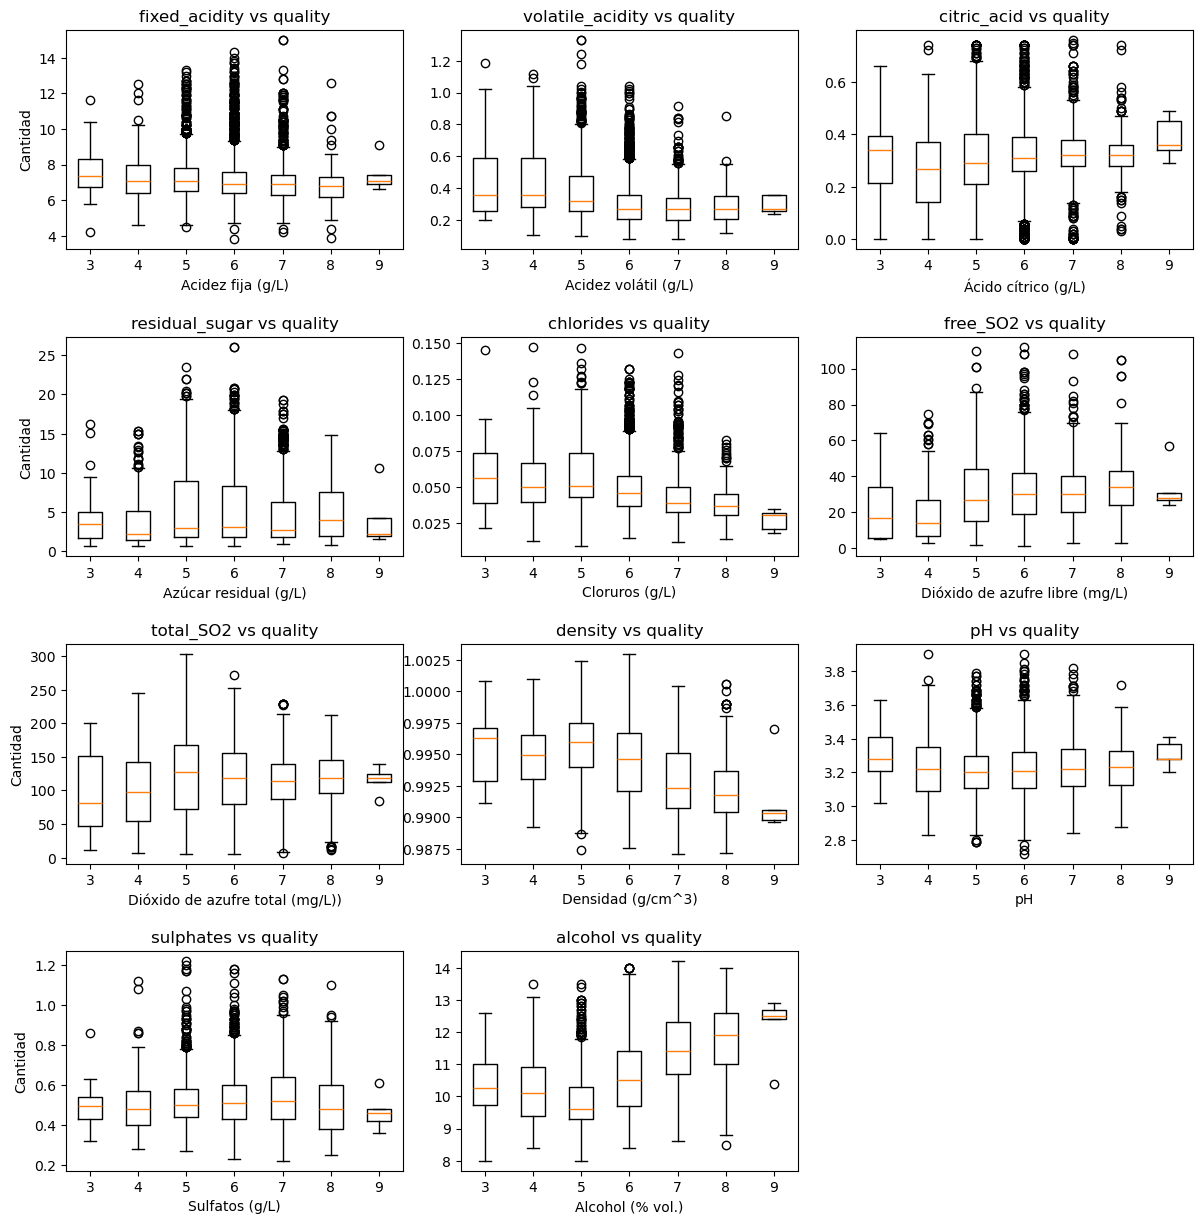

In [29]:
fig, pos = plt.subplots(4, 3, figsize=(12, 12))  # 4 filas y 3 columnas
fig.tight_layout()  # para separar los gráficos
fig.subplots_adjust(hspace=0.4)  # aumentar el espacio entre filas

for i, col_name in enumerate(columns): # De manera que i es el indice y col_name valor de la lista
    # Usamos lógica modular para calcular el valor de las filas y las columnas
    row_i = i // 3
    col_i = i % 3
    
    # Crear los diagramas de cajas
    pos[row_i][col_i].boxplot(
        [dataWine[dataWine["quality"] == q][col_name] for q in sorted(dataWine["quality"].unique())],
        labels=sorted(dataWine["quality"].unique())
    )
    
    # Poner etiqueta del eje x
    pos[row_i][col_i].set_xlabel(xlabels[i])
    
    # Únicamente ponemos el nombre de la etiqueta del eje y una vez por fila
    if col_i == 0:
        pos[row_i][col_i].set_ylabel(ylabel)
    
    # Poner título para cada subplot
    pos[row_i][col_i].set_title(f'{col_name} vs quality')
    
# Desactivar el subplot vacío en la posición [3][2]
pos[3][2].axis('off')

plt.show()

De los gráficos anteriores se tiene sobre las cuatro variables más significativas son:

****1. Ácido volátil vs calidad:****

Se observa una disminución general en la mediana del ácido volátil a medida que la calidad del vino aumenta. Los vinos con menor ácido volátil tienden a tener una mejor calidad. Esto sugiere que altos niveles de ácido volátil pueden estar asociados con sabores indeseables como el olor a vinagre, lo que impacta negativamente en la percepción de calidad del vino.

****2. Cloruros vs calidad:****

Existe una tendencia decreciente en la mediana de cloruros conforme aumenta la calidad. La concentración de cloruros, que pueden indicar salinidad, tiende a ser menor en vinos de mayor calidad. Altos niveles de cloruros pueden influir negativamente en el sabor y, por lo tanto, en la percepción de la calidad.

****3. Densidad vs calidad:****

Se aprecia que la densidad disminuye ligeramente a medida que la calidad aumenta, especialmente en los vinos de calidad más alta (8 y 9). La densidad puede estar relacionada con la cantidad de azúcares y alcohol en el vino. Vinos con menor densidad podrían tener menos azúcares residuales y una composición equilibrada, asociada a una mejor calidad.

****4. Alcohol vs calidad:****

La mediana del contenido de alcohol tiende a aumentar con la calidad del vino. Un mayor contenido de alcohol generalmente está asociado con una mayor calidad del vino, posiblemente porque contribuye a un mejor equilibrio y complejidad de sabores. Los vinos con más alcohol suelen tener un perfil más robusto y completo, lo que puede ser valorado positivamente.

## Regresión Lineal

Utilizando la regresión líneal se busca responder las siguientes preguntas:
    
1. ¿En qué medida la acidez fija y la acidez volátil pueden predecir la acidez total del vino?
2. ¿Qué tan eficazmente pueden el pH y la densidad predecir el contenido de alcohol en el vino?
3. ¿Hasta qué punto los niveles de cloruros y azúcares residuales pueden predecir la densidad del vino?

In [30]:
# Función para preparar las matrices con NumPy
def prepare_matrices(data, independent_vars, dependent_var):
    # Añadir una columna de unos para el término independiente
    X = np.ones((data.shape[0], len(independent_vars) + 1))
    X[:, 1:] = data[independent_vars].values
    y = data[dependent_var].values.reshape(-1, 1)
    return X, y

# Función para realizar la regresión lineal usando NumPy
def linear_regression(X, y):
    Xt = X.T
    XtX = np.dot(Xt, X)
    XtX_inv = np.linalg.inv(XtX)
    Xty = np.dot(Xt, y)
    coefficients = np.dot(XtX_inv, Xty)
    return coefficients

# Pregunta 1: Predicción de acidez total del vino
independent_vars1 = ['fixed_acidity', 'volatile_acidity']
dependent_var1 = 'citric_acid'
X1, y1 = prepare_matrices(dataWine, independent_vars1, dependent_var1)
coefficients1 = linear_regression(X1, y1)
print("Coeficientes para predecir la acidez total:", coefficients1)

# Pregunta 2: Predicción del contenido de alcohol
independent_vars2 = ['pH', 'density']
dependent_var2 = 'alcohol'
X2, y2 = prepare_matrices(dataWine, independent_vars2, dependent_var2)
coefficients2 = linear_regression(X2, y2)
print("Coeficientes para predecir el contenido de alcohol:", coefficients2)

# Pregunta 3: Predicción de la densidad del vino
independent_vars3 = ['chlorides', 'residual_sugar']
dependent_var3 = 'density'
X3, y3 = prepare_matrices(dataWine, independent_vars3, dependent_var3)
coefficients3 = linear_regression(X3, y3)
print("Coeficientes para predecir la densidad del vino:", coefficients3)

Coeficientes para predecir la acidez total: [[ 0.11767726]
 [ 0.04769513]
 [-0.44012611]]
Coeficientes para predecir el contenido de alcohol: [[ 301.96346499]
 [   0.90107657]
 [-295.94806392]]
Coeficientes para predecir la densidad del vino: [[9.87393174e-01]
 [9.73935664e-02]
 [4.05573157e-04]]


## Respondiendo las preguntas planteadas

### Pregunta 1: Predicción del ácido cítrico del vino

**Variables independientes:** `fixed_acidity`, `volatile_acidity`  
**Variable dependiente:** `citric_acid`

Los coeficientes obtenidos son:
- Intercepto: 0.11767726
- Coeficiente para `fixed_acidity`: 0.04769513
- Coeficiente para `volatile_acidity`: -0.44012611

Esto significa que la ecuación de regresión lineal para predecir la `citric_acid` (acidez total) sería:

`citric_acid = 0.11767726 + 0.04769513 × fixed_acidity − 0.44012611 × volatile_acidity`

- **Intercepto:** El valor inicial esperado de `citric_acid` cuando `fixed_acidity` y `volatile_acidity` son cero.
- **Coeficiente de `fixed_acidity`:** Por cada unidad que aumenta `fixed_acidity`, se espera que `citric_acid` aumente en 0.04769513 unidades, manteniendo constante `volatile_acidity`.
- **Coeficiente de `volatile_acidity`:** Por cada unidad que aumenta `volatile_acidity`, se espera que `citric_acid` disminuya en 0.44012611 unidades, manteniendo constante `fixed_acidity`.

Por lo tanto, la acidez fija (`fixed_acidity`) y la acidez volátil (`volatile_acidity`) pueden predecir la acidez total (`citric_acid`) del vino en función de cómo varían estos dos componentes.

### Pregunta 2: Predicción del contenido de alcohol

**Variables independientes:** `pH`, `density`  
**Variable dependiente:** `alcohol`

Los coeficientes obtenidos son:
- Intercepto: 301.96346499
- Coeficiente para `pH`: 0.90107657
- Coeficiente para `density`: -295.94806392

La ecuación de regresión lineal para predecir el `alcohol` basado en `pH` y `density` sería:

`alcohol = 301.96346499 + 0.90107657 × pH − 295.94806392 × density`

- **Intercepto:** El valor inicial esperado de `alcohol` cuando `pH` y `density` son cero.
- **Coeficiente de `pH`:** Por cada unidad que aumenta `pH`, se espera que el contenido de `alcohol` aumente en 0.90107657 unidades, manteniendo constante `density`.
- **Coeficiente de `density`:** Por cada unidad que aumenta `density`, se espera que el contenido de `alcohol` disminuya en 295.94806392 unidades, manteniendo constante `pH`.

Esto sugiere que `pH` y `density` pueden predecir el contenido de alcohol en el vino, aunque el efecto de `density` es más pronunciado en la predicción.

### Pregunta 3: Predicción de la densidad del vino

**Variables independientes:** `chlorides`, `residual_sugar`  
**Variable dependiente:** `density`

Los coeficientes obtenidos son:
- Intercepto: 0.987393174
- Coeficiente para `chlorides`: 0.0973935664
- Coeficiente para `residual_sugar`: 0.000405573157

La ecuación de regresión lineal para predecir `density` en función de `chlorides` y `residual_sugar` es:

`density = 0.987393174 + 0.0973935664 × chlorides + 0.000405573157 × residual_sugar`

- **Intercepto:** El valor inicial esperado de `density` cuando `chlorides` y `residual_sugar` son cero.
- **Coeficiente de `chlorides`:** Por cada unidad que aumenta `chlorides`, se espera que `density` aumente en 0.0973935664 unidades, manteniendo constante `residual_sugar`.
- **Coeficiente de `residual_sugar`:** Por cada unidad que aumenta `residual_sugar`, se espera que `density` aumente en 0.000405573157 unidades, manteniendo constante `chlorides`.

Por lo tanto, los niveles de `chlorides` y `residual_sugar` pueden predecir la densidad del vino, aunque el efecto de `chlorides` es más significativo en la predicción de la densidad.


## Diferencias estadisticas por grupos de comparación

### Preguntas a analizar

En la entrega 1, se obtuvo que las variables que presentaban una mayor correlación (coeficiente de correlación) con la calidad del vino fueron `alcohol` (0.447549) y `density` (0.318176). De igual manera, Se observó en los histogramas que ciertas variables presentan diferencias en sus distribuciones, siendo notables los casos de `volatile_acidity`, `chlorides` y `total_SO2`. Con base en lo anterior, se quiere responder las siguientes preguntas:  

<u>Diferencias utilizando las calidades como variable indepentiende (categorias):
 
 1) **¿Existen diferencias significativas entre las medias de los valores de `alcohol` para las diferentes calidades?**

**R:** *EL ANOVA indica que que existen diferencias significativas entre las diferentes categorías para las medias de `alcohol`. La prueba de Tukey reveló que existen diferencias significativas entre todas las categorías.*   

&nbsp;

 2) **¿Existen diferencias significativas entre las medias de los valores de `density` para las diferentes calidades?**   
 
**R:** *EL ANOVA indica que que existen diferencias significativas entre las diferentes categorías para las medias de `density`. La prueba de Tukey reveló que existen diferencias significativas entre todas las categorías, con excepción de entre los grupos 4 y 6, y 7 y 8.*

&nbsp;
 
 <u>Diferencias utilizando el tipo de vino (rojo o blanco) como variable indepentiende (categorias):  
 
 3) **¿Existen diferencias significativas entre las medias de los valores de `volatile_acidity` para los tipos de vino?**
 
 **R:** *EL ANOVA indica que que existen diferencias significativas entre ambos tipos de vino para las medias de `volatile_acidity`.* 
 
&nbsp;
 
 4) **¿Existen diferencias significativas entre las medias de los valores de `chlorides` para los tipos de vino?**
 
  **R:** *EL ANOVA indica que que existen diferencias significativas entre ambos tipos de vino para las medias de `chlorides`.*
 
&nbsp;
 
 5) **¿Existen diferencias significativas entre las medias de los valores de `total_SO2` para los tipos de vino?**
 
   **R:** *EL ANOVA indica que que existen diferencias significativas entre ambos tipos de vino para las medias de `total_SO2`.*
 
&nbsp;

<u>Conclusión</u>: Debido a los resultados anteriores, en todos los casos se podría decir que la media de los grupos para la variable analizada provienen de diferentes distribuciones. 
     

 **Nota:** *por simplicidad, las respuestas de la **pregunta 11** se respondieron en esta sección, **ver código** en sección de ANOVA.*  
 **Nota 2:** *en la entrega 3 se revizará la normalidad y homocedasticidad de las variables para determinar si estas conclusiones son adecuadas.*

Como se muestra a continuación, las calidades 3 y 9 presentan pocos datos. Por lo que se va a crear un nuevo `DataFrame` sin estas categorias

In [31]:
# Cantidad de observaciones por caldidad
dataWine.value_counts("quality")

quality
6    2698
5    1974
7    1050
4     190
8     187
3      18
9       5
Name: count, dtype: int64

In [32]:
# Eliminar calidades 3 y 9
dataWineQuality4_8 = dataWine[~dataWine["quality"].isin([3, 9])]
dataWineQuality4_8

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6118,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6119,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6120,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [33]:
pd.Series([coefficients1[0]] * len(dataFrame), index=dataFrame.index)

NameError: name 'dataFrame' is not defined

### Gráficos de los grupos a analizar

In [ ]:
# guardamos el nombre de las etiquetas de los ejes Y y X
xlabels = ["Tipo de vino", "Tipo de Vino", "Tipo de Vino", "Calidad", "Calidad"]
ylabels = ["Acidez volátil (g/L)", "Cloruros (g/L)", "Dióxido de azufre total (mg/L)",
            "Alcohol (% vol.)", "Densidad (g/cm^3)",]
independentVariable = ["wine_type", "wine_type", "wine_type", "quality", "quality"]
dependentVariable = ["volatile_acidity", "chlorides", "total_SO2", "alcohol", "density"]

NameError: name 'xlabel' is not defined

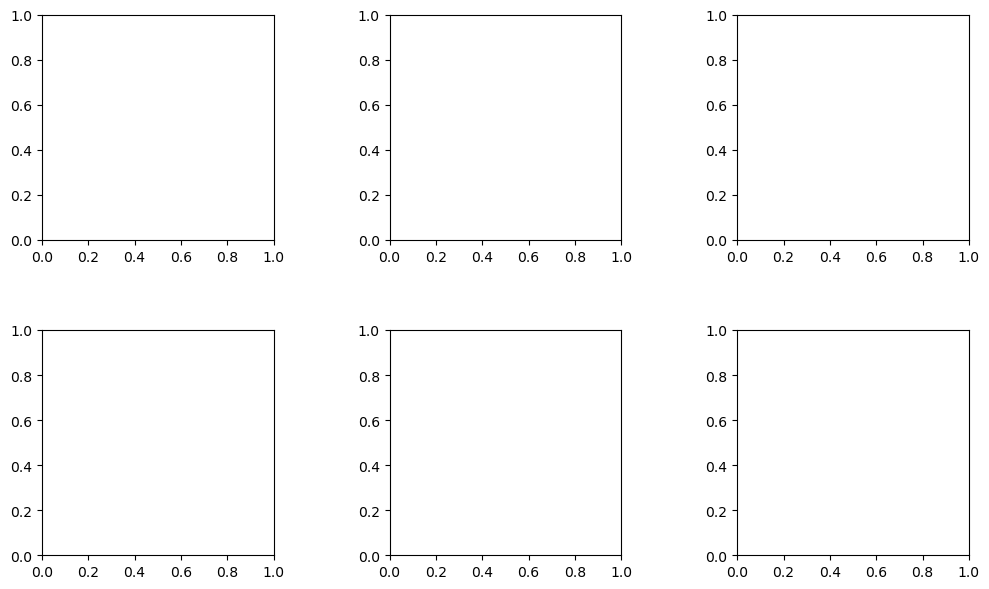

In [34]:
fig, pos = plt.subplots(2, 3, figsize=(10, 6))  # 2 filas y 3 columnas
fig.tight_layout()  # para separar los gráficos
fig.subplots_adjust(hspace=0.4, wspace = 0.5)  # aumentar el espacio entre filas y columnas

for i in range(len(xlabel)): # De manera que i es el indice y col_name valor de la lista
    # Usamos lógica modular para calcular el valor de las filas y las columnas  
    row_i = i // 3
    col_i = i % 3
    # Crear los diagramas de cajas
    indVar = independentVariable[i]
    depVar = dependentVariable[i]
    pos[row_i][col_i].boxplot(
        [dataWine[dataWine[indVar] == q][depVar] for q in sorted(dataWine[indVar].unique())],
        labels=sorted(dataWine[indVar].unique())
    )
    
    # Poner etiqueta del eje x
    pos[row_i][col_i].set_xlabel(xlabels[i])
    
    # Poner etiqueta del eje y
    pos[row_i][col_i].set_ylabel(ylabels[i])
    
    
# Desactivar el subplot vacío en la posición [2][3]
pos[1][2].axis('off')

plt.show()

### ANOVA 

<u>Hipótesis: 

**Nula (H0)**: el promedio de la variable dependiente es igual para todos los grupos/categorias.

**Alternativa (H1)**: el promedio de la variable dependiente es diferente para al menos un grupo/categoria.

<u>Interpretación:
    
Se dice que se rechaza H0 si el *p-value* es menor al nivel de significancia (α). En este caso, se cuenta con evidencia que apoya que almenos una pareja de los grupos estudiados presente diferencias significativas entre los promedios de la variable dependiente. Para determinar cuáles grupos presentan diferencias significativas entre sus medias se debe realizar la prueba HSD de Tukey.

A partir de lo anterior, creamos una función que realice el ANOVA y la prueba de Tukey:

In [35]:
def computeAnova(dataFrame, independentVariable, dependentVariable, significance):
    """
    Función que se encarga de realizar un ANOVA de una vía según el dataframe y el nombre de la variable independiente
    recibida por argumentos.
    
    Args:
        dataFrame(pandas.DataFrame): dataframe que contiene el "set" de datos. 
        independentVariable(str): nombre de la columna que contiene la variable independiente (o categorias) que se usa 
                                  para computar el ANOVA.
        dependentVariable(str): nombre de la columna que contiene la variable dependiente que se usa determinar si hay 
                                diferencias significativas en sus medias.
        significance(int): nivel de significancia que se emplea para determinar si los grupos presentan diferencias significativas. 
    """
    categories = dataFrame[independentVariable].unique()
    date_per_category = [dataFrame[dataFrame[independentVariable] == category][dependentVariable] for category in categories]

    # ANOVA
    _, p_value = stats.f_oneway(*date_per_category)

    print(f"> p-Value: {p_value:}, Significance: {significance}\n") # Si el p-value es reportado como 0, es porque es muy bajo
    print(1.000000)
    # Determinar si hay diferencias significativas
    if (p_value < significance):
        print(f"> p-value < {significance}:")
        print(f"\tLas medias de las categorias almacenadas en {independentVariable} presenta diferencias significativas para la variable {dependentVariable}. \n") 
        print("> Prueba HSD Tukey:\n")
        # Si hay diferencias significativas, se realiza la prueba HSD de Tukey
        tukey = pairwise_tukeyhsd(endog = dataFrame[dependentVariable],
                          groups = dataFrame[independentVariable],
                          alpha = significance) # significancia
        print(tukey)
    else:
        print(f"p-value > {significance}:")
        print(f"\tLas medias de las categorias almacenadas en {independentVariable} no presentan diferencias significativas para la variable {dependentVariable}.")         

**¿Existen diferencias significativas entre las medias de los valores de `alcohol` para las diferentes calidades?:**

In [36]:
computeAnova(dataWineQuality4_8, "quality", "alcohol", 0.05) 
#Nota: p-value es igual a cero porque es muy bajo.

> p-Value: 0.0, Significance: 0.05

1.0
> p-value < 0.05:
	Las medias de las categorias almacenadas en quality presenta diferencias significativas para la variable alcohol. 

> Prueba HSD Tukey:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     4      5  -0.3415 0.0002 -0.5583 -0.1247   True
     4      6   0.4155    0.0  0.2013  0.6297   True
     4      7   1.1992    0.0  0.9742  1.4242   True
     4      8   1.4774    0.0  1.1834  1.7714   True
     5      6    0.757    0.0  0.6725  0.8415   True
     5      7   1.5407    0.0  1.4317  1.6497   True
     5      8   1.8189    0.0  1.6005  2.0372   True
     6      7   0.7837    0.0  0.6799  0.8875   True
     6      8   1.0619    0.0   0.846  1.2777   True
     7      8   0.2782 0.0073  0.0516  0.5047   True
----------------------------------------------------


**¿Existen diferencias significativas entre las medias de los valores de `density` para las diferentes calidades?**

In [37]:
computeAnova(dataWineQuality4_8, "quality", "density", 0.05) 

> p-Value: 6.982855466300594e-167, Significance: 0.05

1.0
> p-value < 0.05:
	Las medias de las categorias almacenadas en quality presenta diferencias significativas para la variable density. 

> Prueba HSD Tukey:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     4      5    0.001    0.0  0.0005  0.0016   True
     4      6  -0.0003 0.7345 -0.0008  0.0003  False
     4      7  -0.0017    0.0 -0.0023 -0.0011   True
     4      8  -0.0023    0.0 -0.0031 -0.0015   True
     5      6  -0.0013    0.0 -0.0015 -0.0011   True
     5      7  -0.0027    0.0  -0.003 -0.0025   True
     5      8  -0.0033    0.0 -0.0039 -0.0027   True
     6      7  -0.0015    0.0 -0.0017 -0.0012   True
     6      8   -0.002    0.0 -0.0026 -0.0015   True
     7      8  -0.0006 0.0643 -0.0012     0.0  False
----------------------------------------------------


**¿Existen diferencias significativas entre las medias de los valores de `volatile_acidity` para los tipos de vino?**:

In [38]:
computeAnova(dataWineQuality4_8, "wine_type", "volatile_acidity", 0.05) 

> p-Value: 0.0, Significance: 0.05

1.0
> p-value < 0.05:
	Las medias de las categorias almacenadas en wine_type presenta diferencias significativas para la variable volatile_acidity. 

> Prueba HSD Tukey:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   Red  White  -0.2509   0.0 -0.2578 -0.244   True
--------------------------------------------------


**¿Existen diferencias significativas entre las medias de los valores de `chlorides` para los tipos de vino?**:

In [39]:
computeAnova(dataWineQuality4_8, "wine_type", "chlorides", 0.05) 

> p-Value: 0.0, Significance: 0.05

1.0
> p-value < 0.05:
	Las medias de las categorias almacenadas en wine_type presenta diferencias significativas para la variable chlorides. 

> Prueba HSD Tukey:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   Red  White  -0.0364   0.0 -0.0371 -0.0356   True
---------------------------------------------------


**¿Existen diferencias significativas entre las medias de los valores de `total_SO2` para los tipos de vino?**:

In [40]:
computeAnova(dataWineQuality4_8, "wine_type", "total_SO2", 0.05) 

> p-Value: 0.0, Significance: 0.05

1.0
> p-value < 0.05:
	Las medias de las categorias almacenadas en wine_type presenta diferencias significativas para la variable total_SO2. 

> Prueba HSD Tukey:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   Red  White  92.8796   0.0 90.5541 95.2052   True
---------------------------------------------------


In [41]:
dataWine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6118,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6119,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6120,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


## Punto 2 - Entrega 3

### Regresión líneal 

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Primero se tomarán las variables `alcohol` y `quality`

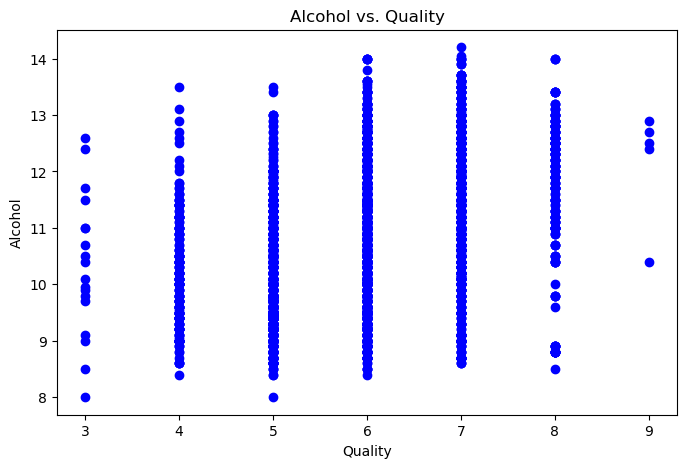

In [77]:
# Graficar Alcohol vs. Quality
plt.figure(figsize=(8, 5))
x_alcohol, y_quality = dataWine["quality"].values, dataWine["alcohol"].values
plt.plot(x_alcohol, y_quality, 'bo')
plt.ylabel('Alcohol')
plt.xlabel('Quality')
plt.title('Alcohol vs. Quality')
plt.show()

Para calcular la regresión lineal se utilizarán los modelos de 'Random Forest'.

Random Forest es una técnica de aprendizaje automático que se utiliza tanto para problemas de regresión como de clasificación. Aunque es más conocida en contextos de clasificación, también se puede adaptar para tareas de regresión.

En el contexto de regresión se utiliza de la siguiente manera:

****1. Ensamble de Árboles de Decisión:**** 
Random Forest se basa en un ensamble de árboles de decisión. Cada árbol de decisión se construye de manera independiente utilizando diferentes subconjuntos del conjunto de datos de entrenamiento y diferentes subconjuntos de características.

****2. Bootstrap Aggregating (Bagging):**** 
Para construir cada árbol de decisión, se emplea un método llamado bagging. Esto implica tomar muestras aleatorias con reemplazo del conjunto de entrenamiento original. Cada árbol se entrena con una de estas muestras.

****3. Selección Aleatoria de Características:****
Además del muestreo aleatorio de datos, cada árbol de decisión se construye utilizando solo un subconjunto aleatorio de las características disponibles en cada división del árbol. Esta selección aleatoria de características ayuda a decorrelacionar los árboles en el ensamble.

****4. Predicción:**** 
Una vez que se han entrenado todos los árboles, para hacer una predicción en el caso de regresión, se toma el promedio de las predicciones individuales de cada árbol. Esto proporciona una predicción final más estable y generalmente más precisa que la predicción de un solo árbol de decisión.

En resumen, Random Forest para regresión combina múltiples árboles de decisión entrenados en diferentes subconjuntos de datos y características para producir una predicción final promediada, que tiende a ser más precisa y generalizable que la predicción de un solo árbol de decisión.

---

En los resultados se esperan las siguientes variables:

****MSE (Error Cuadrático Medio):**** Es una medida de la calidad de una estimación numérica. Cuanto menor sea el MSE, mejor será el modelo en términos de precisión. El MSE se calcula como la media de los cuadrados de los errores, donde el error es la diferencia entre el valor predicho y el valor real.

****R^2 (Coeficiente de Determinación):**** Es una medida estadística que indica qué tan bien se ajustan los valores predichos por el modelo a los valores observados. Puede interpretarse como la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de R^2 más cercano a 1 indica un mejor ajuste del modelo a los datos.

Ajuste inicial:

Random Forest:
MSE: 1.0860653535938665
R^2: 0.22351373088042725


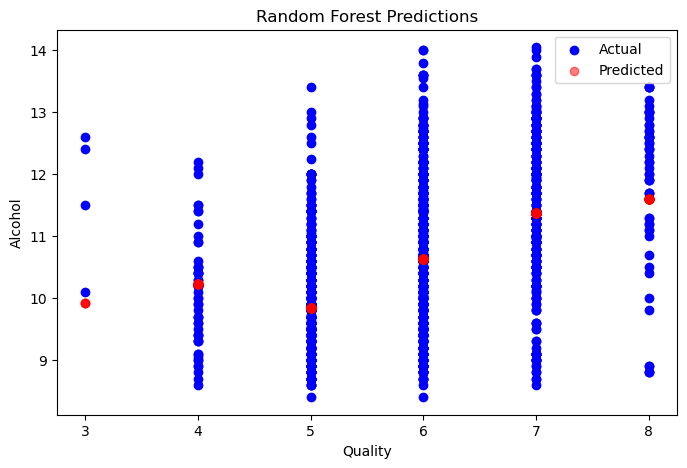

In [78]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = dataWine[['quality']]
y = dataWine['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluación de modelo
print("Random Forest:")
print(f"MSE: {mean_squared_error(y_test, y_rf_pred)}")
print(f"R^2: {r2_score(y_test, y_rf_pred)}")

# Graficar predicciones de Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_rf_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

Ahora se ejecuta el mismo modelo pero con ajustes de optimización:

Random Forest (Optimized):
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
MSE: 1.08606616105687
R^2: 0.2235131535818945


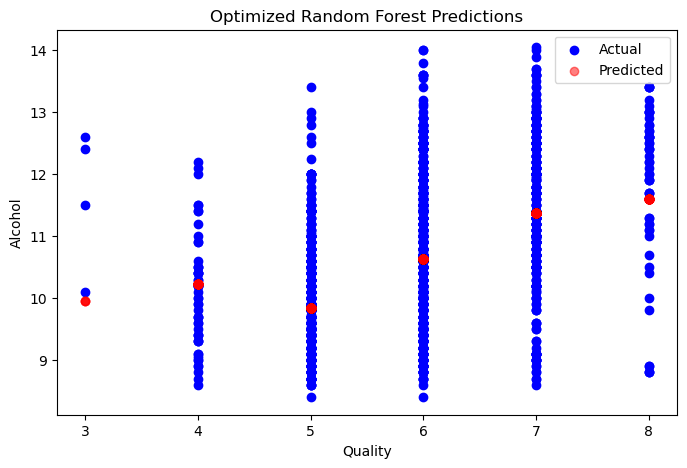

In [79]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = dataWine[['quality']]
y = dataWine['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest - Grid Search
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluación de modelos optimizados
print("Random Forest (Optimized):")
print(f"Best Params: {rf_model.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_rf_pred)}")
print(f"R^2: {r2_score(y_test, y_rf_pred)}")

# Graficar predicciones optimizadas de Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_rf_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Optimized Random Forest Predictions')
plt.legend()
plt.show()

### Análisis de los resultados

****Random Forest:**** Tanto en el ajuste inicial como en el optimizado, muestra un MSE y un R^2 similares, lo que indica que el ajuste no se modificó significativamente con la optimización de los parámetros. El modelo tiene un MSE de alrededor de 1.086 y un R^2 de aproximadamente 0.223, lo que sugiere que explica aproximadamente el 22.3% de la variabilidad en los datos.

## Variables `pH` y `quality`

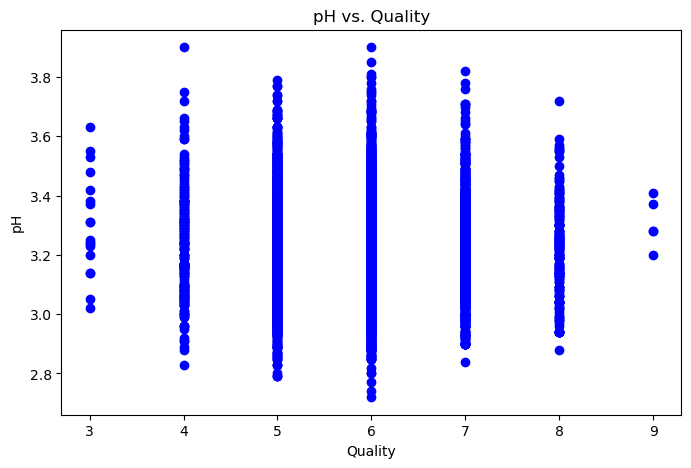

In [80]:
# Graficar pH vs. Quality
plt.figure(figsize=(8, 5))
x_alcohol, y_quality = dataWine["quality"].values, dataWine["pH"].values
plt.plot(x_alcohol, y_quality, 'bo')
plt.ylabel('pH')
plt.xlabel('Quality')
plt.title('pH vs. Quality')
plt.show()

Ajuste inicial:

Random Forest:
MSE: 0.025739783040006278
R^2: -0.002604358467293455


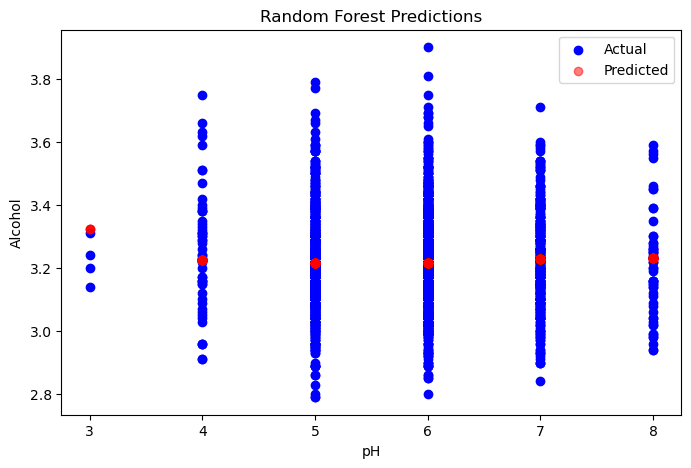

In [81]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = dataWine[['quality']]
y = dataWine['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluación de modelos
print("Random Forest:")
print(f"MSE: {mean_squared_error(y_test, y_rf_pred)}")
print(f"R^2: {r2_score(y_test, y_rf_pred)}")

# Graficar predicciones de Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_rf_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

Ahora se ejecuta el mismo modelo pero con ajustes de optimización:

Random Forest (Optimized):
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
MSE: 1.08606616105687
R^2: 0.2235131535818945


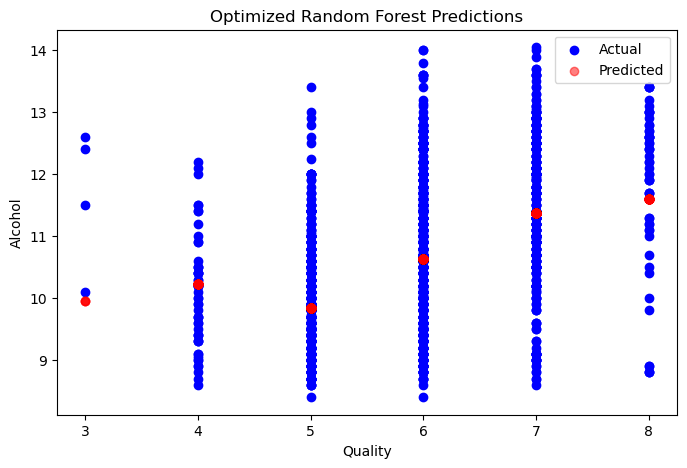

In [82]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = dataWine[['quality']]
y = dataWine['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest - Grid Search
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluación de modelos optimizados
print("Random Forest (Optimized):")
print(f"Best Params: {rf_model.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_rf_pred)}")
print(f"R^2: {r2_score(y_test, y_rf_pred)}")

# Graficar predicciones optimizadas de Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_rf_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Optimized Random Forest Predictions')
plt.legend()
plt.show()

### Análisis de los resultados

****Random Forest:**** En el ajuste inicial, el modelo tenía un MSE muy bajo pero un R^2 ligeramente negativo, lo que podría indicar que el modelo estaba sobreajustando los datos o no era capaz de capturar adecuadamente la estructura subyacente de los datos.
Después de la optimización, aunque el MSE aumentó significativamente, el R^2 mejoró notablemente, lo que indica que el modelo ajustado está mejorando en su capacidad para generalizar y explicar la variabilidad en los datos por lo que el modelo explica aproximadamente el 22.4% de la variabilidad en los datos, siendo esto óptimo.

En conclusión, aunque el MSE aumentó después de la optimización, el R^2 mejoró significativamente, lo que sugiere que el modelo optimizado puede ser más robusto y generalizable en comparación con el ajuste inicial, a pesar del incremento en el error cuadrático medio.